# Balkendiagramme

In [14]:
# Matplotlib config
%matplotlib inline

# SVG-Anzeige anschalten
%config InlineBackend.figure_formats = ['retina']

# Größe definieren
%config InlineBackend.rc = {'figure.figsize': (5.0, 3.0)}

import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("../../data/Diamonds/diamonds.csv.bz2")

Ein Balkendiagramm wird mit der Funktion `sns` für seaborn und `.barplot` für die Diagrammform, gefolgt von der x- und y-Achsenbeschriftung erstellt:

In [15]:
df_color = df.groupby("color").agg(count = ("cut", len))
df_color.head()

,count
color,
D,6775
E,9797
F,9542
G,11292
H,8304


In [16]:
df_color.index.values

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

Mit dieser Funktion werden die Daten grafisch dargestellt, der Befehl

`x = df_color.index.values` übernimmt die Zeilenbeschriftung und 

`y = df_color["count"].values` übernimmt den Zeileninhalt.

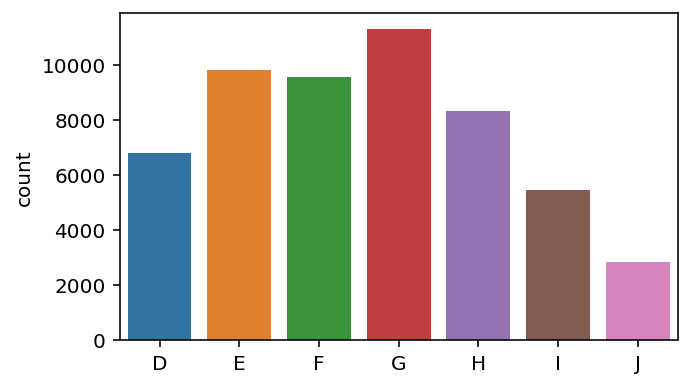

In [17]:
ax = sns.barplot(x = df_color.index.values, y = df_color["count"])

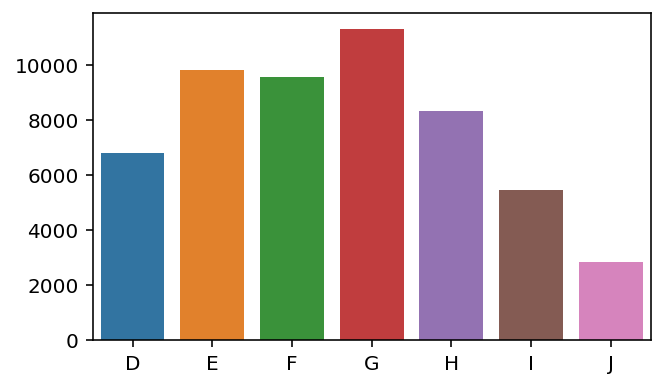

In [18]:
ax = sns.barplot(x = df_color.index.values, y = df_color["count"].values)

Um mehrere Werte in einer Zeile als Balkendiagramm darzustellen, wird als erstes die Rangordnung der X-Achse festgelegt, also wird erst nach dem Schliff und danach nach der Farbe mit folgender Code-Zeile gefiltert: 

`.groupby(["cut", "color"])`

Danach werden die jeweiligen Mittelwerte mit folgender Code-Zeile berechnet:

`.agg(avgP = ("price", np.mean))\)`

In [19]:
df_grouped = df.groupby(["cut", "color"]).agg(avgP = ("price", np.mean))
df_grouped

avgP
cut       color             
Fair      D      4291.061350
          E      3682.312500
          F      3827.003205
          G      4239.254777
          H      5135.683168
          I      4685.445714
          J      4975.655462
Good      D      3405.382175
          E      3423.644159
          F      3495.750275
          G      4123.482204
          H      4276.254986
          I      5078.532567
          J      4574.172638
Ideal     D      2629.094566
          E      2597.550090
          F      3374.939362
          G      3720.706388
          H      3889.334831
          I      4451.970377
          J      4918.186384
Premium   D      3631.292576
          E      3538.914420
          F      4324.890176
          G      4500.742134
          H      5216.706780
          I      5946.180672
          J      6294.591584
Very Good D      3470.467284
          E      3214.652083
          F      3778.820240
          G      3872.753806
          H      4535.390351
          I      5255.879568
          J      5103.513274

Um die Daten darzustellen, wird dazu mit folgendem Befehl der Index zurückgesetzt:

`.reset_index()`

In [20]:
df_grouped = df\
    .groupby(["cut", "color"])\
    .agg(avgP = ("price", np.mean))\
    .reset_index()
df_grouped.head()

,cut,color,avgP
0,Fair,D,4291.061350
1,Fair,E,3682.312500
2,Fair,F,3827.003205
3,Fair,G,4239.254777
4,Fair,H,5135.683168


Nun wird wie oben ein Balkendiagramm erstellt und zusätzlich mit `hue` die Balken noch eingefärbt.

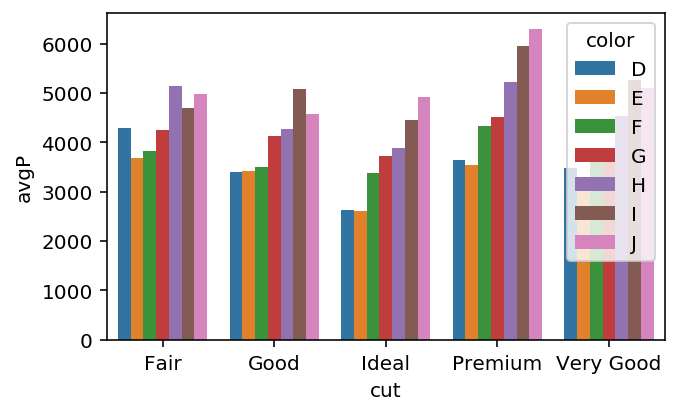

In [21]:
sns.barplot(x = df_grouped["cut"], 
            y = df_grouped["avgP"], 
            hue = df_grouped["color"]);

Die nachfolgende Programmzeilen sollen folgendes Problem darstellen: Wir haben zu jeder Farbe 3 Spalten, die wir so nicht in ein Balkendiagramm übertragen können, mit dem `.melt` Befehl, gefolgt von der Spalte, die wir nicht zusammenführen wollen, können wir nun die Spalten zusammenführen indem wir die `avgX`, `avgY` und die `avgZ` Spalte in einer `variable` Spalte speichern.

In [22]:
df_grouped = df.groupby("color")\
    .agg(avgX = ("x", np.mean),\
         avgY = ("y", np.mean),\
         avgZ = ("z", np.mean))
    
df_grouped

,avgX,avgY,avgZ
color,,,
D,5.417051,5.421128,3.342827
E,5.411580,5.419029,3.340689
F,5.614961,5.619456,3.464446
G,5.677543,5.680192,3.505021
H,5.983335,5.984815,3.695965
I,6.222826,6.222730,3.845411
J,6.519338,6.518105,4.033251


In [23]:
df_grouped = df\
    .groupby("color")\
    .agg(avgX = ("x", np.mean), avgY = ("y", np.mean), avgZ = ("z", np.mean))\
    .reset_index()\
    .melt(id_vars = ["color"])

df_grouped

,color,variable,value
0,D,avgX,5.417051
1,E,avgX,5.411580
2,F,avgX,5.614961
3,G,avgX,5.677543
4,H,avgX,5.983335
5,I,avgX,6.222826
6,J,avgX,6.519338
7,D,avgY,5.421128
8,E,avgY,5.419029
9,F,avgY,5.619456


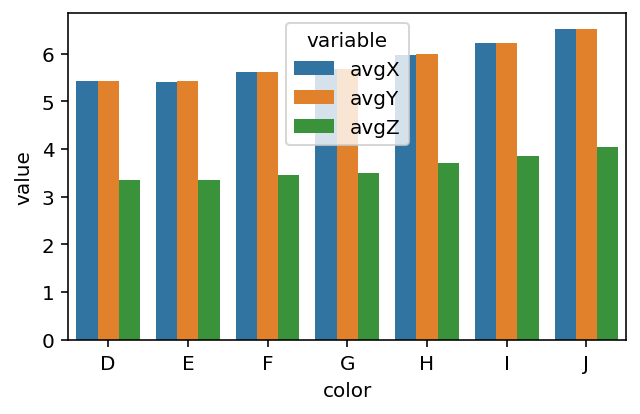

In [24]:
sns.barplot(x = df_grouped["color"], 
            y = df_grouped["value"], 
            hue = df_grouped["variable"]);